## Version Description:
In this version we use data with original column names. The CycleGAN generates the following columns (i.e all major features):
`CAO_LH_SumFlow`,`CAO_RH_SumFlow`,`LAO_LH_SumFlow`,`LAO_RH_SumFlow`, `MIXP`,`AMBP`,`AMBT`,`R600_HD`, `R610_HS1`, `R611_HS1`, `R612_HS1`, `R613_HS1`, `R620_HS1`, `R620_HS2`, `R620_HS3`, `R621_HS1`, `R621_HS2`, `R621_HS3` 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import random
import pandas as pd
from numpy import hstack,zeros,ones,set_printoptions,array,asarray
from numpy.random import rand, randn, randint

#Set some numpy print options for displaying numpy arrays to fit maximum width of cell
set_printoptions(precision=3, edgeitems=30, linewidth=1000,formatter=dict(float=lambda x: "%.3g" % x))

# Disable Warnings for chained assignments Eg:Setting with Copy Warning
pd.options.mode.chained_assignment = None 

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('seaborn-whitegrid')

In [4]:
## Specify column variables to read TZ6 data
input_features = ['CAOLH_SumFlow','CAORH_SumFlow','LAOLH_SumFlow','LAORH_SumFlow','MIXP','AMBP','AMBT']
restrictors  = ['R600_HD','R610_HS1','R611_HS1','R612_HS1','R613_HS1','R620_HS1','R620_HS2','R620_HS3','R621_HS1','R621_HS2','R621_HS3']
usecols = ['HoV']+input_features+restrictors

In [5]:
# Read Original LTR and Restrictor Dataframes for TZ6
LTR_df = pd.read_csv('../data/TZ6_dataset.csv', usecols = usecols)[usecols]
LTR_df.drop([14],inplace=True) # Drop bad E1 point
LTR_df.reset_index(inplace = True,drop = True)
LTR_df

,HoV,CAOLH_SumFlow,CAORH_SumFlow,LAOLH_SumFlow,LAORH_SumFlow,MIXP,AMBP,AMBT,R600_HD,R610_HS1,R611_HS1,R612_HS1,R613_HS1,R620_HS1,R620_HS2,R620_HS3,R621_HS1,R621_HS2,R621_HS3
0,A1,217.197005,222.443249,133.373448,136.693697,2600.000000,101401.6000,299.386667,148,131,136,120,120,75,38,113,75,38,113
1,A1,217.248929,223.698078,132.780168,135.684064,2600.000000,101576.3000,298.448667,149,131,136,120,120,75,38,113,75,38,113
2,A2,229.778639,226.831740,140.650844,143.718662,2606.192800,102136.6035,297.109024,152,131,136,114,120,75,38,113,75,38,113
3,A3,225.091032,227.788705,137.109226,142.122616,2599.899800,103195.6642,295.060027,154,131,136,120,120,75,38,113,75,38,113
4,A4,225.200989,222.557674,130.494552,135.055208,2600.000000,102856.2000,294.755833,148,145,153,130,130,75,38,113,75,38,113
5,A5,219.262425,224.116355,134.592700,136.976394,2600.000000,101325.0000,293.150000,148,131,136,120,120,75,38,113,75,38,113
6,C1,223.440382,221.545157,131.587840,135.045592,2600.000000,100650.4000,294.146833,148,131,136,120,120,75,38,113,75,38,113
7,C2,234.831632,227.430207,140.009418,140.335213,2601.856275,100356.9848,295.465578,153,131,140,120,125,75,38,113,75,38,113
8,C3,233.883252,227.395643,138.322614,140.139693,2595.415050,100252.7728,297.643472,152,131,136,120,125,75,38,113,75,38,113
9,C4,223.948083,221.782661,131.346490,134.297502,2600.000000,102484.2000,295.507500,150,131,136,120,120,75,38,113,75,38,113


In [31]:
Simulation_FDDN_df = pd.read_csv('../data/FDDN_dataset.csv', usecols = usecols)[usecols]
Simulation_FDDN_df

ValueError: Usecols do not match columns, columns expected but not found: ['CAOLH_SumFlow', 'R620_HS2', 'CAORH_SumFlow', 'R620_HS3', 'R621_HS2', 'LAORH_SumFlow', 'LAOLH_SumFlow', 'R620_HS1', 'R621_HS1', 'R621_HS3']

### Rescale and Normalize Data

In [7]:
from sklearn.preprocessing import MinMaxScaler
# Common MinMaxScaler for all features.
scaler = MinMaxScaler()

In [8]:
dataset_LTR = LTR_df.iloc[:,1:]
dataset_FDDN = Simulation_FDDN_df.iloc[:,1:]

In [9]:
dataset_LTR

,CAOLH_SumFlow,CAORH_SumFlow,LAOLH_SumFlow,LAORH_SumFlow,MIXP,AMBP,AMBT,R600_HD,R610_HS1,R611_HS1,R612_HS1,R613_HS1,R620_HS1,R620_HS2,R620_HS3,R621_HS1,R621_HS2,R621_HS3
0,217.197005,222.443249,133.373448,136.693697,2600.000000,101401.6000,299.386667,148,131,136,120,120,75,38,113,75,38,113
1,217.248929,223.698078,132.780168,135.684064,2600.000000,101576.3000,298.448667,149,131,136,120,120,75,38,113,75,38,113
2,229.778639,226.831740,140.650844,143.718662,2606.192800,102136.6035,297.109024,152,131,136,114,120,75,38,113,75,38,113
3,225.091032,227.788705,137.109226,142.122616,2599.899800,103195.6642,295.060027,154,131,136,120,120,75,38,113,75,38,113
4,225.200989,222.557674,130.494552,135.055208,2600.000000,102856.2000,294.755833,148,145,153,130,130,75,38,113,75,38,113
5,219.262425,224.116355,134.592700,136.976394,2600.000000,101325.0000,293.150000,148,131,136,120,120,75,38,113,75,38,113
6,223.440382,221.545157,131.587840,135.045592,2600.000000,100650.4000,294.146833,148,131,136,120,120,75,38,113,75,38,113
7,234.831632,227.430207,140.009418,140.335213,2601.856275,100356.9848,295.465578,153,131,140,120,125,75,38,113,75,38,113
8,233.883252,227.395643,138.322614,140.139693,2595.415050,100252.7728,297.643472,152,131,136,120,125,75,38,113,75,38,113
9,223.948083,221.782661,131.346490,134.297502,2600.000000,102484.2000,295.507500,150,131,136,120,120,75,38,113,75,38,113


In [10]:
dataset_FDDN

,CAOLH_SumFlow,CAORH_SumFlow,LAOLH_SumFlow,LAORH_SumFlow,MIXP,AMBP,AMBT,R600_HD,R610_HS1,R611_HS1,R612_HS1,R613_HS1,R620_HS1,R620_HS2,R620_HS3,R621_HS1,R621_HS2,R621_HS3
0,176.194306,183.838086,108.820955,107.380847,1800,102926.0,297.15,146,131,136,120,120,75,38,113,75,38,113
1,213.215038,222.451801,131.595030,129.860531,2600,102426.0,299.15,146,131,136,120,120,75,38,113,75,38,113
2,241.185680,251.630057,148.769313,146.805694,3400,103127.0,294.15,146,131,136,120,120,75,38,113,75,38,113
3,177.057588,184.967479,108.840240,107.394407,1800,101825.0,295.15,146,131,136,120,120,79,39,113,78,39,113
4,214.406259,223.974228,131.697294,129.953811,2600,100523.0,295.15,146,131,136,120,120,79,39,113,78,39,113
5,243.742634,254.602406,149.615493,147.646825,3400,101925.0,295.15,146,131,136,120,120,79,39,113,78,39,113
6,175.721146,178.678090,108.526406,107.090940,1800,103027.0,293.15,146,131,136,114,120,75,38,113,75,38,113
7,214.779029,218.389113,132.553728,130.810540,2600,100523.0,295.15,146,131,136,114,120,75,38,113,75,38,113
8,245.794632,249.927535,151.606684,149.594922,3400,101925.0,299.15,146,131,136,114,120,75,38,113,75,38,113
9,179.763606,182.960842,110.506254,109.038405,1800,100724.0,298.15,146,131,136,114,120,79,39,113,78,39,113


In [11]:
# Rescale Data
colnames_all = list(dataset_LTR)
dataset_LTR[colnames_all] = scaler.fit_transform(dataset_LTR[colnames_all])
dataset_FDDN[colnames_all] = scaler.fit_transform(dataset_FDDN[colnames_all])

In [12]:
print('No. of columns in LTR dataframe :',dataset_LTR.shape[1])
print('No. of columns in FDDN dataframe:',dataset_FDDN.shape[1])

No. of columns in LTR dataframe : 18
No. of columns in FDDN dataframe: 18


In [13]:
# example of defining composite models for training cyclegan generators
from keras.optimizers import Adam
from keras.models import Model, Sequential, Input
from keras.layers import Dense, LeakyReLU, Activation
from keras.initializers import RandomNormal
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [14]:
# Select a batch of random samples, returns features and target
def generate_real_samples(dataset, n_samples):
    # choose random instances of indices
    ix = randint(0, dataset.shape[0], n_samples)
    # retrieve samples from indices
    X = dataset.iloc[ix].values
    # generate 'real' class labels (1)
    y = ones((n_samples,1))
    return X, y

In [15]:
# generate a batch of fake examples with class labels
def generate_fake_samples(gen_model, dataset):
    # generate fake instance
    X = gen_model.predict(dataset)
    # create 'fake' class labels (0)
    y = zeros((len(X),1))
    return X, y

### Define Architecture of Generator and Discriminator

In [16]:
# define the discriminator model
def define_discriminator(nr_features):
    init = RandomNormal(stddev=0.02)
    model = Sequential()
    model.add(Dense(nr_features, activation='relu',kernel_initializer=init, input_shape=(nr_features,)))
    model.add(Dense(32, activation='relu',kernel_initializer=init))
    model.add(Dense(1, activation='linear'))
    # compile model
    model.compile(loss='mse', optimizer=Adam(lr=0.0002, beta_1=0.5), loss_weights=[0.5])
#     model.compile(loss='binary_crossentropy', optimizer='adam')
#     model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
    return model
 
 # define the standalone generator model
def define_generator(nr_features):
    init = RandomNormal(stddev=0.02)
    model = Sequential()
    model.add(Dense(nr_features, activation='relu',kernel_initializer=init, input_shape=(nr_features,)))
    model.add(Dense(32, activation='relu',kernel_initializer=init))  
    model.add(Dense(nr_features, activation='linear'))
    return model

In [17]:
# define a composite model for updating generators by adversarial and cycle loss
def define_composite_model(g_model_1, d_model, g_model_2, nr_features):
    # ensure the model we're updating is trainable
    g_model_1.trainable = True
    # mark discriminator as not trainable
    d_model.trainable = False
    # mark other generator model as not trainable
    g_model_2.trainable = False
    # discriminator element
    input_gen = Input(shape=(nr_features,))
    gen1_out = g_model_1(input_gen)
    output_d = d_model(gen1_out)
    # identity element
    input_id = Input(shape=(nr_features,))
    output_id = g_model_1(input_id)
    # forward cycle
    output_f = g_model_2(gen1_out)
    # backward cycle
    gen2_out = g_model_2(input_id)
    output_b = g_model_1(gen2_out)
    # define model graph
    model = Model([input_gen, input_id], [output_d, output_id, output_f, output_b])
    # define optimization algorithm configuration
    opt = Adam(lr=0.0002, beta_1=0.5)
    # compile model with weighting of least squares loss and L1 loss
    model.compile(loss=['mse', 'mse', 'mse', 'mse'], loss_weights=[1, 5, 10, 10], optimizer=opt)
    return model

nr_features = dataset_LTR.shape[1]
# generator: A -> B
g_model_AtoB = define_generator(nr_features)
# generator: B -> A
g_model_BtoA = define_generator(nr_features)
# discriminator: A -> [real/fake]
d_model_A = define_discriminator(nr_features)
# discriminator: B -> [real/fake]
d_model_B = define_discriminator(nr_features)
# composite: A -> B -> [real/fake, A]
c_model_AtoB = define_composite_model(g_model_AtoB, d_model_B, g_model_BtoA, nr_features)
# composite: B -> A -> [real/fake, B]
c_model_BtoA = define_composite_model(g_model_BtoA, d_model_A, g_model_AtoB, nr_features)

In [18]:
c_model_AtoB.output_shape

[(None, 1), (None, 18), (None, 18), (None, 18)]

In [19]:
c_model_AtoB.input_shape

[(None, 18), (None, 18)]

In [20]:
# generate samples and save as a plot and save the model
def summarize_performance(epoch_step, g_model, trainX, name):
    # select a sample of input images
    X_in, _ = generate_real_samples(trainX, n_samples = 32)
    # generate translated images
    X_out, _ = generate_fake_samples(g_model_BtoA, X_in)
    # Inverse scale to real value
    X_in = scaler.inverse_transform(X_in)
    X_out = scaler.inverse_transform(X_out)
    # Scatter plot of real and fake data points
    plt.scatter(X_in[:, 0], X_in[:, -1], color='red',label = 'Real Data')
    plt.scatter(X_out[:, 0], X_out[:, -1], color='blue', label = 'Synthesized Data')
    plt.ylabel("R600_HD")
    plt.xlabel("TZ6_Flow")
    plt.legend(loc="upper left")
    plt.show()
  # save plot to file
#   filename1 = '%s_generated_plot_%06d.png' % (name, (epoch_step+1))
#   plt.savefig(filename1)  

In [21]:
# update simulation pool for fake datapoints
def update_sim_pool(pool, data_points, max_size=5):
    selected = list()
    for data in data_points:
        if len(pool) < max_size:
            # stock the pool
            pool.append(data)
            selected.append(data)
        elif random.random() < 0.5:
            # use data point, but don't add it to the pool
            selected.append(data)
        else:
            # replace an existing data point and use replaced data point
            ix = randint(0, len(pool))
            selected.append(pool[ix])
            pool[ix] = data
    return asarray(selected)

In [22]:
# train cyclegan models
def train(d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, dataset):
    # define properties of the training run
    n_epochs, n_batch = 3750, 16
    # unpack dataset
    trainA, trainB = dataset
    # prepare image pool for fakes
    poolA, poolB = list(), list()
    # prepare lists for storing training loss history stats 
    discA_loss_realA_hist, discA_loss_fakeA_hist = list(), list()
    discB_loss_realB_hist, discB_loss_fakeB_hist = list(), list()
    gen_loss_A2B_hist, gen_loss_B2A_hist = list(), list()
    # calculate the number of batches per training epoch
    bat_per_epo = int(len(trainA) / n_batch)
    # calculate the number of training iterations
    n_steps = bat_per_epo * n_epochs
    # manually enumerate epochs
    for i in range(n_steps):
        # select a batch of real samples
        X_realA, y_realA = generate_real_samples(trainA, n_samples = 32)
        X_realB, y_realB = generate_real_samples(trainB, n_samples = 32)
        # generate a batch of fake samples
        X_fakeA, y_fakeA = generate_fake_samples(g_model_BtoA, X_realB)
        X_fakeB, y_fakeB = generate_fake_samples(g_model_AtoB, X_realA)
        # update fakes from pool
        X_fakeA = update_sim_pool(poolA, X_fakeA)
        X_fakeB = update_sim_pool(poolB, X_fakeB)
        # update generator B->A via adversarial and cycle loss
        g_loss2, _, _, _, _  = c_model_BtoA.train_on_batch([X_realB, X_realA], [y_realA, X_realA, X_realB, X_realA])        
        # update discriminator for A -> [real/fake]
        dA_loss1 = d_model_A.train_on_batch(X_realA, y_realA)
        dA_loss2 = d_model_A.train_on_batch(X_fakeA, y_fakeA)
        # update generator A->B via adversarial and cycle loss
        g_loss1, _, _, _, _ = c_model_AtoB.train_on_batch([X_realA, X_realB], [y_realB, X_realB, X_realA, X_realB])
        # update discriminator for B -> [real/fake]
        dB_loss1 = d_model_B.train_on_batch(X_realB, y_realB)
        dB_loss2 = d_model_B.train_on_batch(X_fakeB, y_fakeB)
        discA_loss_realA_hist.append(dA_loss1)
        discA_loss_fakeA_hist.append(dA_loss2)
        discB_loss_realB_hist.append(dB_loss1)
        discB_loss_fakeB_hist.append(dB_loss2)
        gen_loss_A2B_hist.append(g_loss1)
        gen_loss_B2A_hist.append(g_loss2)
        # summarize performance and Print training statistics every 100 Epochs 
        if (i+1) % 100 == 0:
#             print('>%d, dA[%.3f,%.3f] dB[%.3f,%.3f] g[%.3f,%.3f]' % (i+1, dA_loss1,dA_loss2, dB_loss1,dB_loss2, g_loss1,g_loss2))
            print('Epoch:',i+1,'; discA_realA:',round(dA_loss1,3),'; discA_fakeA:',round(dA_loss2,3),'; discB_realB:',round(dB_loss1,3),
                '; discB_fakeB:',round(dB_loss2,3),'; gen_loss_A2B:',round(g_loss1,3),';gen_loss_B2A:',round(g_loss2,3))
             # Plot samples 
#             summarize_performance(i, g_model_AtoB, trainA, 'AtoB')
#             summarize_performance(i, g_model_BtoA, trainB, 'BtoA')
#             print('Epoch:',i+1,'; discA_realA:',array(dA_loss1),'; discA_fakeA:', array(dA_loss2),
#                 '; discB_realB:', array(dB_loss1),'; discB_fakeB:', array(dB_loss2),
#                 '; gen_loss_A2B:', array(g_loss1),'; gen_loss_B2A:',array(g_loss2))
    return discA_loss_realA_hist,discA_loss_fakeA_hist,discB_loss_realB_hist,discB_loss_fakeB_hist,gen_loss_A2B_hist,gen_loss_B2A_hist

In [23]:
# select a batch of real samples
# X_realA, y_realA = generate_real_samples(dataset_LTR, n_samples = 8)
# X_realB, y_realB = generate_real_samples(dataset_FDDN, n_samples = 32)

In [24]:
# generate a batch of fake samples
# X_fakeA, y_fakeA = generate_fake_samples(g_model_BtoA, X_realB)
# X_fakeB, y_fakeB = generate_fake_samples(g_model_AtoB, X_realA)

In [25]:
# load a dataset as a list of two numpy arrays
dataset = [dataset_LTR,dataset_FDDN]
# train models
discA_loss_realA_hist, discA_loss_fakeA_hist, discB_loss_realB_hist, discB_loss_fakeB_hist, gen_loss_A2B_hist, gen_loss_B2A_hist = train(d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, dataset)

Epoch: 100 ; discA_realA: 0.138 ; discA_fakeA: 0.068 ; discB_realB: 0.081 ; discB_fakeB: 0.06 ; gen_loss_A2B: 3.591 ;gen_loss_B2A: 3.305
Epoch: 200 ; discA_realA: 0.151 ; discA_fakeA: 0.138 ; discB_realB: 0.065 ; discB_fakeB: 0.113 ; gen_loss_A2B: 2.117 ;gen_loss_B2A: 1.784
Epoch: 300 ; discA_realA: 0.182 ; discA_fakeA: 0.122 ; discB_realB: 0.069 ; discB_fakeB: 0.102 ; gen_loss_A2B: 2.011 ;gen_loss_B2A: 1.67
Epoch: 400 ; discA_realA: 0.177 ; discA_fakeA: 0.117 ; discB_realB: 0.084 ; discB_fakeB: 0.094 ; gen_loss_A2B: 1.948 ;gen_loss_B2A: 1.749
Epoch: 500 ; discA_realA: 0.17 ; discA_fakeA: 0.119 ; discB_realB: 0.059 ; discB_fakeB: 0.081 ; gen_loss_A2B: 2.096 ;gen_loss_B2A: 1.762
Epoch: 600 ; discA_realA: 0.167 ; discA_fakeA: 0.101 ; discB_realB: 0.07 ; discB_fakeB: 0.065 ; gen_loss_A2B: 2.006 ;gen_loss_B2A: 1.691
Epoch: 700 ; discA_realA: 0.166 ; discA_fakeA: 0.114 ; discB_realB: 0.061 ; discB_fakeB: 0.049 ; gen_loss_A2B: 1.998 ;gen_loss_B2A: 1.555
Epoch: 800 ; discA_realA: 0.15 ; discA

Epoch: 6100 ; discA_realA: 0.126 ; discA_fakeA: 0.116 ; discB_realB: 0.1 ; discB_fakeB: 0.147 ; gen_loss_A2B: 0.606 ;gen_loss_B2A: 0.622
Epoch: 6200 ; discA_realA: 0.123 ; discA_fakeA: 0.121 ; discB_realB: 0.094 ; discB_fakeB: 0.086 ; gen_loss_A2B: 0.636 ;gen_loss_B2A: 0.525
Epoch: 6300 ; discA_realA: 0.116 ; discA_fakeA: 0.114 ; discB_realB: 0.086 ; discB_fakeB: 0.097 ; gen_loss_A2B: 0.581 ;gen_loss_B2A: 0.51
Epoch: 6400 ; discA_realA: 0.12 ; discA_fakeA: 0.122 ; discB_realB: 0.104 ; discB_fakeB: 0.095 ; gen_loss_A2B: 0.582 ;gen_loss_B2A: 0.512
Epoch: 6500 ; discA_realA: 0.127 ; discA_fakeA: 0.115 ; discB_realB: 0.102 ; discB_fakeB: 0.11 ; gen_loss_A2B: 0.517 ;gen_loss_B2A: 0.486
Epoch: 6600 ; discA_realA: 0.126 ; discA_fakeA: 0.12 ; discB_realB: 0.116 ; discB_fakeB: 0.106 ; gen_loss_A2B: 0.552 ;gen_loss_B2A: 0.511
Epoch: 6700 ; discA_realA: 0.126 ; discA_fakeA: 0.129 ; discB_realB: 0.128 ; discB_fakeB: 0.114 ; gen_loss_A2B: 0.565 ;gen_loss_B2A: 0.471
Epoch: 6800 ; discA_realA: 0.114 

In [26]:
# create a line plot of loss for the gan and save to file
def plot_history(discA_loss_realA_hist, discA_loss_fakeA_hist, discB_loss_realB_hist, discB_loss_fakeB_hist, gen_loss_A2B_hist, gen_loss_B2A_hist):
    ### plot Training Loss Performance of DiscA, DiscB, Gen ###
    fig = plt.figure(figsize=(15,12))
    ax1 = plt.subplot(2, 1, 1)
    ax1.plot(discA_loss_realA_hist, label='discA-realA')
    ax1.plot(discA_loss_fakeA_hist, label='discA-fakeA')
    ax1.plot(discB_loss_realB_hist, label='discB-realB')
    ax1.plot(discB_loss_fakeB_hist, label='discB-fakeB')
    ax1.plot(gen_loss_A2B_hist, label='Gen-A2B')
    ax1.plot(gen_loss_B2A_hist, label='Gen-B2A')
    ax1.legend()
  # save plot to file
#   plt.savefig('plots/GAN_Training_loss.png')
#   plt.close()

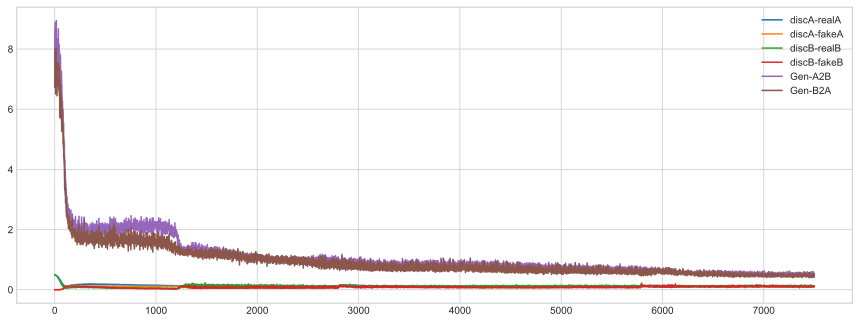

In [27]:
plot_history(discA_loss_realA_hist, discA_loss_fakeA_hist, discB_loss_realB_hist, discB_loss_fakeB_hist, gen_loss_A2B_hist, gen_loss_B2A_hist)

### Synthesise Artificial data with trained CycleGAN

In [28]:
X_syn_scaled1,_ = generate_fake_samples(g_model_AtoB,  dataset_FDDN)
X_synthesised1 = scaler.inverse_transform(X_syn_scaled1)
df_syn1 = pd.DataFrame(data = X_synthesised1, columns = colnames_all)
array_of_hovs = ['CGAN_ASD{}'.format(i) for i in range(len(df_syn1))] # Use List Comprehension to create unique HoV Label for the artificial data point
df_syn1.insert(0, "HoV",array_of_hovs)

In [29]:
df_syn1['TZ6_Flow'] = df_syn1[['CAOLH_SumFlow', 'CAORH_SumFlow', 'LAOLH_SumFlow','LAORH_SumFlow']].sum(axis = 1)
df_syn1

,HoV,CAOLH_SumFlow,CAORH_SumFlow,LAOLH_SumFlow,LAORH_SumFlow,MIXP,AMBP,AMBT,R600_HD,R610_HS1,R611_HS1,R612_HS1,R613_HS1,R620_HS1,R620_HS2,R620_HS3,R621_HS1,R621_HS2,R621_HS3,TZ6_Flow
0,CGAN_ASD0,170.693787,183.311584,106.025093,105.606674,1614.274414,101990.742188,298.189026,150.038040,130.876343,137.362885,118.349701,120.736198,75.296730,38.039093,112.982597,75.145500,38.049728,113.026886,565.637146
1,CGAN_ASD1,210.728775,221.334335,130.286728,129.575073,2516.467773,101862.476562,300.963898,148.411179,130.525238,137.101532,118.223961,120.376633,75.170303,38.004341,112.960182,75.001999,38.003777,113.012772,691.924927
2,CGAN_ASD2,235.734283,247.651794,145.434357,145.461700,2845.415771,102207.859375,294.534515,154.722031,131.390167,139.047699,116.941490,120.978485,75.044273,38.003315,112.973213,75.000565,38.029949,113.043724,774.282104
3,CGAN_ASD3,177.049881,175.138260,105.381851,102.213333,1605.430420,101428.109375,295.851501,147.180267,130.602386,136.510742,118.278389,119.691696,79.432983,39.111095,113.054245,78.257812,39.127659,113.004005,559.783325
4,CGAN_ASD4,224.598801,220.034897,131.771042,127.875648,2580.948730,100829.187500,294.563660,146.190323,132.187683,137.839523,118.500763,119.385880,79.803635,39.202682,113.047012,78.474808,39.202747,112.972504,704.280396
5,CGAN_ASD5,251.960846,252.618057,149.853561,147.218109,3216.282715,101421.867188,295.541321,148.179123,132.387146,138.886688,118.054016,119.823715,78.942406,38.957844,112.996643,77.793213,38.983551,112.994507,801.650635
6,CGAN_ASD6,172.767136,186.980225,107.457397,107.734932,1540.603271,101894.640625,293.385345,153.625595,129.002518,135.268341,116.537994,119.871780,75.078064,37.991985,113.010193,75.031883,38.030193,113.043793,574.939697
7,CGAN_ASD7,211.155411,225.365326,132.427658,133.313232,2576.449707,100980.382812,294.950073,149.736069,128.757416,134.609314,116.411674,119.200714,74.647774,37.914783,112.950409,74.686142,37.891205,113.037918,702.261658
8,CGAN_ASD8,246.019775,257.034210,153.112350,152.070206,3318.585205,101743.320312,300.969269,148.708267,128.282471,134.860565,115.959335,118.857719,75.129181,37.996063,112.930702,74.989944,38.017178,113.030174,808.236511
9,CGAN_ASD9,185.391220,185.141068,111.868637,108.023636,1931.335449,101145.468750,298.694183,144.181030,129.258713,135.190735,117.313995,118.241501,79.767929,39.168888,113.026772,78.454910,39.167030,113.008842,590.424561


In [30]:
df_syn1.to_csv('../data/CycleGAN_ASD.csv', index = False)